In [4]:
!mkdir dataset

# New Section

In [5]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print(dataset_path)  # what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))


['phones', 'headphones', 'earphones', '.ipynb_checkpoints']
Types of classes labels found:  4


In [6]:
!rm -rf ipynd_checkpoints

In [7]:
class_labels = []

for item in dataset_path:
    # Get all the file names
    all_classes = os.listdir('dataset' + '/' + item)

    # Add them to the list
    for room in all_classes:
        class_labels.append((item, 'dataset' + '/' + item + '/' + room))

# Print the first 5 elements of the class_labels list
print(class_labels[:5])


[('phones', 'dataset/phones/phones102.png'), ('phones', 'dataset/phones/phones197.png'), ('phones', 'dataset/phones/phones86.png'), ('phones', 'dataset/phones/phones47.png'), ('phones', 'dataset/phones/phones171.png')]


In [8]:
# Build a dataframe
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())


   Labels                         image
0  phones  dataset/phones/phones102.png
1  phones  dataset/phones/phones197.png
2  phones   dataset/phones/phones86.png
3  phones   dataset/phones/phones47.png
4  phones  dataset/phones/phones171.png
        Labels                               image
267  earphones  dataset/earphones/04FG4GFTD7DL.png
268  earphones  dataset/earphones/NPR2KQVMZB1E.png
269  earphones  dataset/earphones/FA4K09T0EXE6.png
270  earphones  dataset/earphones/COZ9D11ZNDGX.png
271  earphones  dataset/earphones/3EQPDGD8DPTM.png


In [9]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

# Count the number of samples for each category (label)
label_count = df['Labels'].value_counts()
print(label_count)


Total number of images in the dataset:  272
phones        198
headphones     52
earphones      22
Name: Labels, dtype: int64


In [10]:
import cv2
import os

path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)
    filenames = [j for j in os.listdir(data_path)]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)


In [11]:
# This model takes input images of shape (224, 224, 3), and the input data should range [0, 255].
images = np.array(images)

# Normalize pixel values to be in the range [0, 1]
images = images.astype('float32') / 255.0

# Print the shape of the normalized images
print(images.shape)


(272, 224, 224, 3)


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Extract labels from the 'Labels' column
y = df['Labels'].values
print("Original labels:\n", y)

# Use LabelEncoder to convert categorical labels to numerical format
y_labelencoder = LabelEncoder()
y_encoded = y_labelencoder.fit_transform(y)
print("Encoded labels:\n", y_encoded)


Original labels:
 ['phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones' 'phones'
 'phones' 'phones' 'phones' 'phon

In [13]:
# Reshape y to have a single column
y = y.reshape(-1, 1)

# Use ColumnTransformer with OneHotEncoder to perform one-hot encoding
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y)

# Print the one-hot encoded labels
print("One-hot encoded labels (first 5):\n", Y[:5])
print("One-hot encoded labels (from index 35 onwards):\n", Y[35:])


One-hot encoded labels (first 5):
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
One-hot encoded labels (from index 35 onwards):
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0

In [14]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle images and labels in the same random order
images, Y = shuffle(images, Y, random_state=1)

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

# Inspect the shape of the training and testing sets
print("Training data shape:")
print("train_x:", train_x.shape)
print("train_y:", train_y.shape)

print("\nTesting data shape:")
print("test_x:", test_x.shape)
print("test_y:", test_y.shape)


Training data shape:
train_x: (258, 224, 224, 3)
train_y: (258, 3)

Testing data shape:
test_x: (14, 224, 224, 3)
test_y: (14, 3)


In [15]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)


In [16]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 3)                 4053414   
 )                                                               
                                                                 
Total params: 4053414 (15.46 MB)
Trainable params: 4011391 (15.30 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
Epoch 1/30
9/9 - 109s - loss: 2.3009 - accuracy: 0.5853 - 109s/epoch - 12s/step
Epoch 2/30
9/9 - 73s - loss: 0.8978 - accuracy: 0.7636 - 73s/epoch - 8s/step
Epoch 3/30
9/9 - 71s - loss: 0.6696 - accuracy: 0.8101 - 71s/epoch - 8s/step
Epoch 4/30
9/9 - 71s - loss: 0.8604 - accuracy: 0.7442 - 71s/epoch - 8s/step
Epoch 5/30
9/9 - 70s - loss: 1.6127 

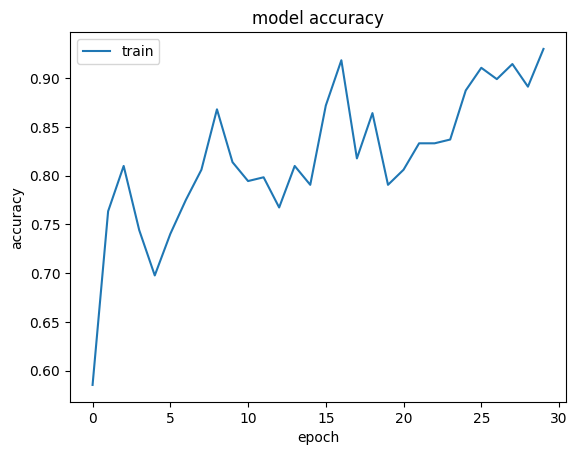

In [17]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    # Uncomment the line below if you have validation data
    # plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)


In [18]:
preds = model.evaluate(test_x, test_y)
print("Loss =", preds[0])
print("Test Accuracy =", preds[1])


1/1 [==============================] - 3s 3s/step - loss: 0.7034 - accuracy: 0.6429
Loss = 0.7034338712692261
Test Accuracy = 0.6428571343421936


Input image shape: (1, 224, 224, 3)


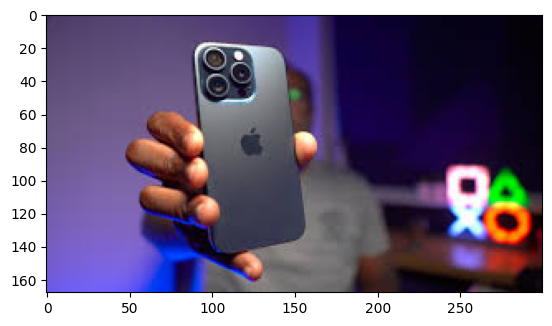

In [19]:
from matplotlib.pyplot import imread, imshow
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import cv2
import numpy as np

img_path = 'testimage.jpg'

# Load and preprocess the image using cv2
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

# Display the image
my_image = imread(img_path)
imshow(my_image)



In [24]:
preds = model.predict(x)

# Display the predicted probabilities for each class
print("Probabilities for each class:", preds)

# Get the predicted class index
predicted_class_index = np.argmax(preds)

# Map the class index to the corresponding class label
class_labels = {0: 'earphones', 1: 'headphones', 2: 'phones'}  # Replace with your actual class labels

predicted_class_label = class_labels[predicted_class_index]

# Display the predicted class label
print("Predicted class:", predicted_class_label)



1/1 [==============================] - 0s 291ms/step
Probabilities for each class: [[0. 0. 1.]]
Predicted class: phones


In [21]:
# Check if GPU is enabled and list available physical devices
tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [22]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_performance = model.fit(train_x, train_y, epochs=30, verbose=2)


Epoch 1/30
9/9 - 68s - loss: 0.1234 - accuracy: 0.9612 - 68s/epoch - 8s/step
Epoch 2/30
9/9 - 66s - loss: 0.1472 - accuracy: 0.9496 - 66s/epoch - 7s/step
Epoch 3/30
9/9 - 66s - loss: 0.1842 - accuracy: 0.9147 - 66s/epoch - 7s/step
Epoch 4/30
9/9 - 66s - loss: 0.2129 - accuracy: 0.9535 - 66s/epoch - 7s/step
Epoch 5/30
9/9 - 67s - loss: 0.2073 - accuracy: 0.9419 - 67s/epoch - 7s/step
Epoch 6/30
9/9 - 65s - loss: 0.1916 - accuracy: 0.9302 - 65s/epoch - 7s/step
Epoch 7/30
9/9 - 64s - loss: 0.1618 - accuracy: 0.9496 - 64s/epoch - 7s/step
Epoch 8/30
9/9 - 65s - loss: 0.1705 - accuracy: 0.9419 - 65s/epoch - 7s/step
Epoch 9/30
9/9 - 65s - loss: 0.3525 - accuracy: 0.9380 - 65s/epoch - 7s/step
Epoch 10/30
9/9 - 64s - loss: 0.1360 - accuracy: 0.9651 - 64s/epoch - 7s/step
Epoch 11/30
9/9 - 67s - loss: 0.2545 - accuracy: 0.9380 - 67s/epoch - 7s/step
Epoch 12/30
9/9 - 66s - loss: 0.2533 - accuracy: 0.9186 - 66s/epoch - 7s/step
Epoch 13/30
9/9 - 64s - loss: 0.1444 - accuracy: 0.9651 - 64s/epoch - 7s/

In [23]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_performance = model.fit(train_x, train_y, epochs=30, verbose=2)


Epoch 1/30
9/9 - 65s - loss: 0.0766 - accuracy: 0.9806 - 65s/epoch - 7s/step
Epoch 2/30
9/9 - 65s - loss: 0.0613 - accuracy: 0.9767 - 65s/epoch - 7s/step
Epoch 3/30
9/9 - 67s - loss: 0.1352 - accuracy: 0.9651 - 67s/epoch - 7s/step
Epoch 4/30
9/9 - 65s - loss: 0.2387 - accuracy: 0.9380 - 65s/epoch - 7s/step
Epoch 5/30
9/9 - 64s - loss: 0.0994 - accuracy: 0.9767 - 64s/epoch - 7s/step
Epoch 6/30
9/9 - 65s - loss: 0.1365 - accuracy: 0.9457 - 65s/epoch - 7s/step
Epoch 7/30
9/9 - 65s - loss: 0.0925 - accuracy: 0.9690 - 65s/epoch - 7s/step
Epoch 8/30
9/9 - 64s - loss: 0.1701 - accuracy: 0.9496 - 64s/epoch - 7s/step
Epoch 9/30
9/9 - 64s - loss: 0.1433 - accuracy: 0.9496 - 64s/epoch - 7s/step
Epoch 10/30
9/9 - 65s - loss: 0.1086 - accuracy: 0.9651 - 65s/epoch - 7s/step
Epoch 11/30
9/9 - 63s - loss: 0.0693 - accuracy: 0.9767 - 63s/epoch - 7s/step
Epoch 12/30
9/9 - 65s - loss: 0.1207 - accuracy: 0.9651 - 65s/epoch - 7s/step
Epoch 13/30
9/9 - 63s - loss: 0.0952 - accuracy: 0.9690 - 63s/epoch - 7s/

# New Section

Input image shape: (1, 224, 224, 3)


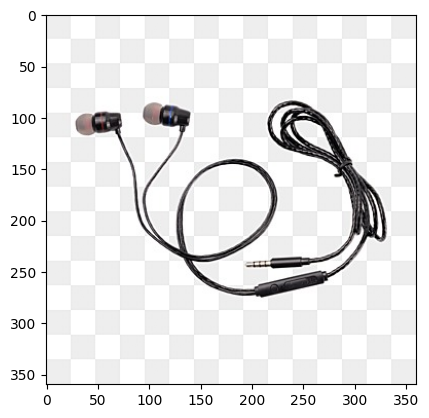

In [25]:
from matplotlib.pyplot import imread, imshow
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import cv2
import numpy as np

img_path = 'testimage2.png'

# Load and preprocess the image using cv2
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

# Display the image
my_image = imread(img_path)
imshow(my_image)

In [26]:
preds = model.predict(x)

# Display the predicted probabilities for each class
print("Probabilities for each class:", preds)

# Get the predicted class index
predicted_class_index = np.argmax(preds)

# Map the class index to the corresponding class label
class_labels = {0: 'earphones', 1: 'headphones', 2: 'phones'}  # Replace with your actual class labels

predicted_class_label = class_labels[predicted_class_index]

# Display the predicted class label
print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 83ms/step
Probabilities for each class: [[0. 0. 1.]]
Predicted class: phones


Input image shape: (1, 224, 224, 3)


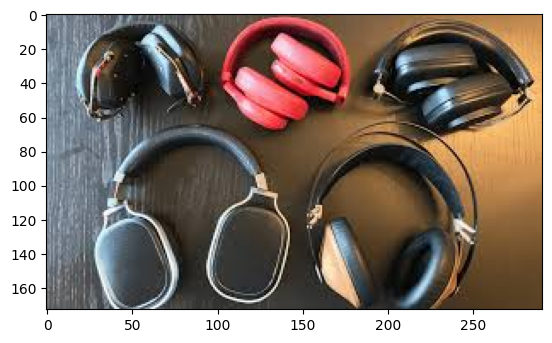

In [28]:
from matplotlib.pyplot import imread, imshow
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import cv2
import numpy as np

img_path = 'testimage3.jpg'

# Load and preprocess the image using cv2
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

# Display the image
my_image = imread(img_path)
imshow(my_image)

In [29]:
preds = model.predict(x)

# Display the predicted probabilities for each class
print("Probabilities for each class:", preds)

# Get the predicted class index
predicted_class_index = np.argmax(preds)

# Map the class index to the corresponding class label
class_labels = {0: 'earphones', 1: 'headphones', 2: 'phones'}  # Replace with your actual class labels

predicted_class_label = class_labels[predicted_class_index]

# Display the predicted class label
print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 210ms/step
Probabilities for each class: [[0. 0. 1.]]
Predicted class: phones
